# Visualize Output from MiniWeather Application
By: Daniel Howard
Date: April 21st, 2022

This notebook visualizes output generated from [MiniWeather](https://github.com/mrnorman/miniWeather).

### Import needed packages and setup environment

In [1]:
import xarray as xr

# pyplot needed to plot the d0ataset, but animation only needed much further down.
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

# In case we haven't created it yet, make sure that we have a directory for images and videos
# and clear any prior images from the directory
! test -d img_MiniWeather/frames && rm -rf img_MiniWeather/frames/* || mkdir -p img_MiniWeather/frames

### Read in MiniWeather data and create objects for each variable
Uses the default MiniWeather output file `output.nc` located in the `$HOME` directory. Modify this as needed.

In [5]:
miniWeather_data = xr.open_dataset("output.nc")
time = miniWeather_data.t
density = miniWeather_data.dens
u_wind = miniWeather_data.uwnd
w_wind = miniWeather_data.wwnd
pot_temp = miniWeather_data.theta
miniWeather_data

<xarray.Dataset>
Dimensions:  (t: 6, z: 100, x: 200)
Coordinates:
  * t        (t) float64 0.0 2.333 4.333 6.333 8.333 10.01
Dimensions without coordinates: z, x
Data variables:
    dens     (t, z, x) float64 ...
    uwnd     (t, z, x) float64 ...
    wwnd     (t, z, x) float64 ...
    theta    (t, z, x) float64 ...

### Display static image plots across time for each variable
Modify the arrangement of the images by specifying the `cw` variable.

In [6]:
cw = int(len(time)/2) # Specifies number of plots per row, divisor indicates number of rows

#### Density Variable

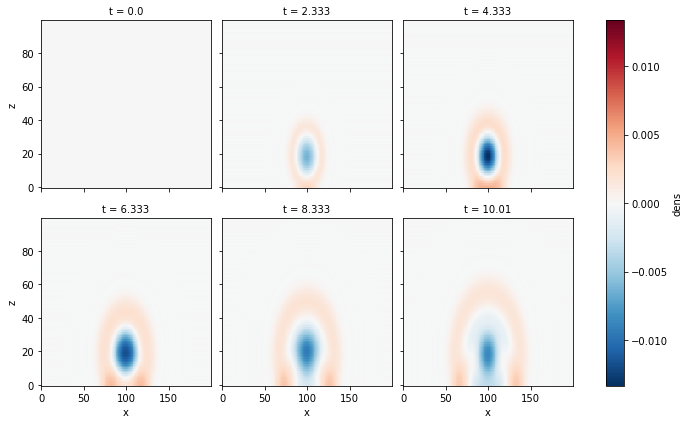

In [7]:
density.plot(x="x", y="z", col="t", col_wrap=cw)

#### U-direction Wind Speed Variable

In [ ]:
u_wind.plot(x="x", y="z", col="t", col_wrap=cw)

#### W-direction Wind Speed Variable

In [ ]:
w_wind.plot(x="x", y="z", col="t", col_wrap=cw)

#### Potential Temperature Variable

In [ ]:
pot_temp.plot(x="x", y="z", col="t", col_wrap=cw)

### Display dynamic images for each variable
Adjust the `vmin` and `vmax` variables as needed for each variable. Use the prior static plots for range suggestions.

#### Density: Interactive

In [ ]:
%%capture
# Get a handle on the figure and axes, set size of figure
fig, ax = plt.subplots(figsize=(18,9))
# Plot the initial frame. 
cax = density[0,:,:].plot(
    add_colorbar=True, cmap='coolwarm',# Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=-0.0008, vmax=0.0008,         # Range of colorbar values
    cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
    )                                  # Other possibilities would be 'both', 'min', or 'max'

In [ ]:
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(density[frame,:,:].values.flatten());
    ax.set_title("Time = {:1.3e} sec".format(time.values[frame]));

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=len(time),# Could also be iterable or list
    interval=250     # ms between frames
);
HTML(ani.to_jshtml())

#### Density: Save GIF

In [ ]:
for t in range(len(time)):
    density[t,:,:].plot(
        figsize = (12,6),                  # Make figure a bit bigger
        vmin=-0.0008, vmax=0.0008,         # Range of colorbar values
        cmap='coolwarm',                   # Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
        cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
                                           # Other possibilities would be 'both', 'min', or 'max'
    )
    plt.title("Time = {:1.3e} sec".format(time.values[t]))
    plt.savefig(f"img_MiniWeather/frames/dens_{t:04}.png")
    plt.close()
    
# Use ImageMagick to create a GIF
!convert -dispose background `pwd`/img_MiniWeather/frames/dens_*.png `pwd`/img_MiniWeather/dens.gif
display(HTML("<img src='img_MiniWeather/dens.gif' />"))

#### U-direction Wind Speed: Interactive

In [ ]:
%%capture
# Get a handle on the figure and axes, set size of figure
fig, ax = plt.subplots(figsize=(18,9))
# Plot the initial frame. 
cax = u_wind[0,:,:].plot(
    add_colorbar=True, #cmap='coolwarm',# Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=14.75, vmax=15.25,            # Range of colorbar values
    cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
    )                                  # Other possibilities would be 'both', 'min', or 'max'

In [ ]:
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(u_wind[frame,:,:].values.flatten())
    ax.set_title("Time = {:1.3e} sec".format(time.values[frame]))

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=len(time),# Could also be iterable or list
    interval=250     # ms between frames
)
HTML(ani.to_jshtml())

#### U-direction Wind Speed: Save GIF

In [ ]:
for t in range(len(time)):
    u_wind[t,:,:].plot(
        figsize = (12,6),                  # Make figure a bit bigger
        vmin=14.75, vmax=15.25,            # Range of colorbar values
        cmap='coolwarm',                   # Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
        cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
                                           # Other possibilities would be 'both', 'min', or 'max'
    )
    plt.title("Time = {:1.3e} sec".format(time.values[t]))
    plt.savefig(f"img_MiniWeather/frames/uwnd_{t:04}.png")
    plt.close()
    
# Use ImageMagick to create a GIF
!convert -dispose background `pwd`/img_MiniWeather/frames/uwnd_*.png `pwd`/img_MiniWeather/uwnd.gif
display(HTML("<img src='img_MiniWeather/uwnd.gif' />"))

#### W-direction Wind Speed: Interactive

In [ ]:
%%capture
# Get a handle on the figure and axes, set size of figure
fig, ax = plt.subplots(figsize=(18,9))
# Plot the initial frame. 
cax = w_wind[0,:,:].plot(
    add_colorbar=True, cmap='coolwarm',# Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=-0.31, vmax=0.31,             # Range of colorbar values
    cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
    )                                  # Other possibilities would be 'both', 'min', or 'max'

In [ ]:
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(w_wind[frame,:,:].values.flatten())
    ax.set_title("Time = {:1.3e} sec".format(time.values[frame]))

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=len(time),# Could also be iterable or list
    interval=250     # ms between frames
)
HTML(ani.to_jshtml())

#### W-direction Wind Speed: Save GIF

In [ ]:
for t in range(len(time)):
    w_wind[t,:,:].plot(
        figsize = (12,6),                  # Make figure a bit bigger
        vmin=-0.31, vmax=0.31,             # Range of colorbar values
        cmap='coolwarm',                   # Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
        cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
                                           # Other possibilities would be 'both', 'min', or 'max'
    )
    plt.title("Time = {:1.3e} sec".format(time.values[t]))
    plt.savefig(f"img_MiniWeather/frames/wwnd_{t:04}.png")
    plt.close()
    
# Use ImageMagick to create a GIF
!convert -dispose background `pwd`/img_MiniWeather/frames/wwnd_*.png `pwd`/img_MiniWeather/wwnd.gif
display(HTML("<img src='img_MiniWeather/wwnd.gif' />"))

#### Potential Temperature: Interactive

In [ ]:
%%capture
# Get a handle on the figure and axes, set size of figure
fig, ax = plt.subplots(figsize=(18,9))
# Plot the initial frame. 
cax = pot_temp[0,:,:].plot(
    add_colorbar=True, cmap='coolwarm',# Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=-0.21, vmax=0.21,             # Range of colorbar values
    cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
    )                                  # Other possibilities would be 'both', 'min', or 'max'

In [ ]:
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(pot_temp[frame,:,:].values.flatten())
    ax.set_title("Time = {:1.3e} sec".format(time.values[frame]))

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=len(time),# Could also be iterable or list
    interval=250     # ms between frames
)
HTML(ani.to_jshtml())

#### Potential Temperature: Save GIF

In [ ]:
for t in range(len(time)):
    pot_temp[t,:,:].plot(
        figsize = (12,6),                  # Make figure a bit bigger
        vmin=-0.21, vmax=0.21,             # Range of colorbar values
        cmap='coolwarm',                   # Change colormap, see matplotlib.org/stable/tutorials/colors/colormaps.html
        cbar_kwargs={ 'extend':'neither' } # Don't extend the colorbar in either direction.
                                           # Other possibilities would be 'both', 'min', or 'max'
    )
    plt.title("Time = {:1.3e} sec".format(time.values[t]))
    plt.savefig(f"img_MiniWeather/frames/theta_{t:04}.png")
    plt.close()
    
# Use ImageMagick to create a GIF
!convert -dispose background `pwd`/img_MiniWeather/frames/theta_*.png `pwd`/img_MiniWeather/theta.gif
display(HTML("<img src='img_MiniWeather/theta.gif' />"))